In [1]:
# 1) Prepare a classification model using Naive Bayes for salary data 

# Data Description:

# age -- age of a person
# workclass	-- A work class is a grouping of work 
# education	-- Education of an individuals	
# maritalstatus -- Marital status of an individulas	
# occupation	 -- occupation of an individuals
# relationship -- 	
# race --  Race of an Individual
# sex --  Gender of an Individual
# capitalgain --  profit received from the sale of an investment	
# capitalloss	-- A decrease in the value of a capital asset
# hoursperweek -- number of hours work per week	
# native -- Native of an individual
# Salary -- salary of an individual

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [3]:
df1=pd.read_csv('SalaryData_Train.csv')
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df2=pd.read_csv('SalaryData_Test.csv')
df2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
df=pd.concat([df1, df2],ignore_index=True)
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.shape

(45221, 14)

In [8]:
df.size

633094

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [10]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
df.duplicated().any()

True

In [12]:
df.drop_duplicates(inplace=True)
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45215,48,Local-gov,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [13]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [14]:
lab_enc=LabelEncoder()

In [15]:
df[['workclass','education','occupation','maritalstatus','relationship','native','Salary']]=df[['workclass','education','occupation','maritalstatus','relationship','native','Salary']].apply(LabelEncoder().fit_transform)
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,White,Male,2174,0,40,37,0
1,50,4,9,13,2,3,0,White,Male,0,0,13,37,0
2,38,2,11,9,0,5,1,White,Male,0,0,40,37,0
3,53,2,1,7,2,5,0,Black,Male,0,0,40,37,0
4,28,2,9,13,2,9,5,Black,Female,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45215,48,1,12,14,0,7,1,White,Male,0,0,40,37,0
45216,33,2,9,13,4,9,3,White,Male,0,0,40,37,0
45217,39,2,9,13,0,9,1,White,Female,0,0,36,37,0
45219,44,2,9,13,0,0,3,Asian-Pac-Islander,Male,5455,0,40,37,0


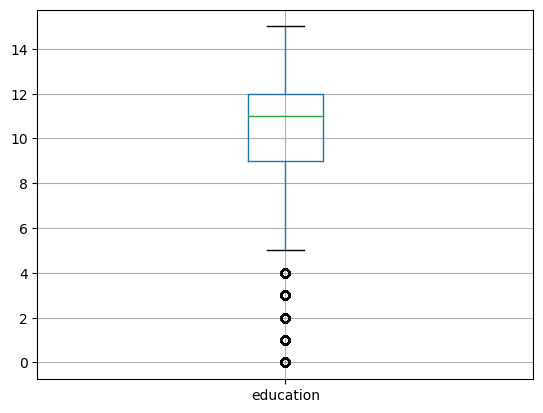

In [16]:
df.boxplot('education')
plt.show()

In [17]:
Q3=df['education'].quantile(0.75)
Q3

12.0

In [18]:
Q1=df['education'].quantile(0.25)
Q1

9.0

In [19]:
IQR=Q3-Q1
IQR

3.0

In [20]:
lower_extreme= Q1-1.5*IQR
lower_extreme

4.5

In [21]:
upper_extreme= Q3+1.5*IQR
upper_extreme

16.5

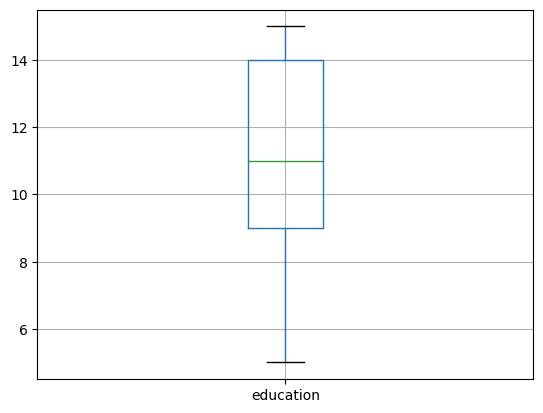

In [22]:
df_no_outliers= df[(df['education']>lower_extreme) & (df['education']<upper_extreme)]
df_no_outliers.boxplot('education')
plt.show()

In [23]:
target=df_no_outliers[['Salary']]
target

,Salary
0,0
1,0
2,0
4,0
5,0
...,...
45215,0
45216,0
45217,0
45219,0


In [24]:
features=df_no_outliers.drop(['Salary','sex','race'],axis=1)
features

,age,workclass,education,educationno,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,2174,0,40,37
1,50,4,9,13,2,3,0,0,0,13,37
2,38,2,11,9,0,5,1,0,0,40,37
4,28,2,9,13,2,9,5,0,0,40,4
5,37,2,12,14,2,3,5,0,0,40,37
...,...,...,...,...,...,...,...,...,...,...,...
45215,48,1,12,14,0,7,1,0,0,40,37
45216,33,2,9,13,4,9,3,0,0,40,37
45217,39,2,9,13,0,9,1,0,0,36,37
45219,44,2,9,13,0,0,3,5455,0,40,37


In [25]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=150)

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(26614, 11)
(26614, 1)
(8872, 11)
(8872, 1)


In [27]:
x_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [28]:
x_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [29]:
scaler=MinMaxScaler()

In [30]:
x_train=scaler.fit_transform(x_train)

In [31]:
x_test=scaler.transform(x_test)

In [32]:
naive_bayes=GaussianNB()

In [33]:
naive_bayes.fit(x_train,y_train)

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [34]:
y_pred= naive_bayes.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
array=naive_bayes.predict_proba(x_test)
array

array([[9.58010739e-01, 4.19892609e-02],
       [9.99884335e-01, 1.15665133e-04],
       [9.99704876e-01, 2.95124476e-04],
       ...,
       [9.86815257e-01, 1.31847430e-02],
       [9.51620037e-01, 4.83799629e-02],
       [9.86414442e-01, 1.35855577e-02]])

In [36]:
accuracy_score(y_test,y_pred)

0.7745716862037872

In [37]:
probabilities=naive_bayes.predict_proba(x_test)
probabilities

array([[9.58010739e-01, 4.19892609e-02],
       [9.99884335e-01, 1.15665133e-04],
       [9.99704876e-01, 2.95124476e-04],
       ...,
       [9.86815257e-01, 1.31847430e-02],
       [9.51620037e-01, 4.83799629e-02],
       [9.86414442e-01, 1.35855577e-02]])

In [38]:
class_labels=np.unique(y_test)
class_labels

array([0, 1])

In [39]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.94      0.86      6435\n           1       0.69      0.33      0.44      2437\n\n    accuracy                           0.77      8872\n   macro avg       0.74      0.64      0.65      8872\nweighted avg       0.76      0.77      0.74      8872\n'

In [40]:
from sklearn.metrics import precision_score,recall_score,f1_score,balanced_accuracy_score

In [41]:
precision=precision_score(y_test,y_pred)
precision

0.6888504753673294

In [42]:
recall=recall_score(y_test,y_pred)
recall

0.327041444398851

In [43]:
f1=f1_score(y_test,y_pred)
f1

0.4435169727323316

In [44]:
balanced=balanced_accuracy_score(y_test,y_pred)
balanced

0.6355486942273976

In [45]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[6075,  360],
       [1640,  797]], dtype=int64)

In [46]:
import seaborn as sns

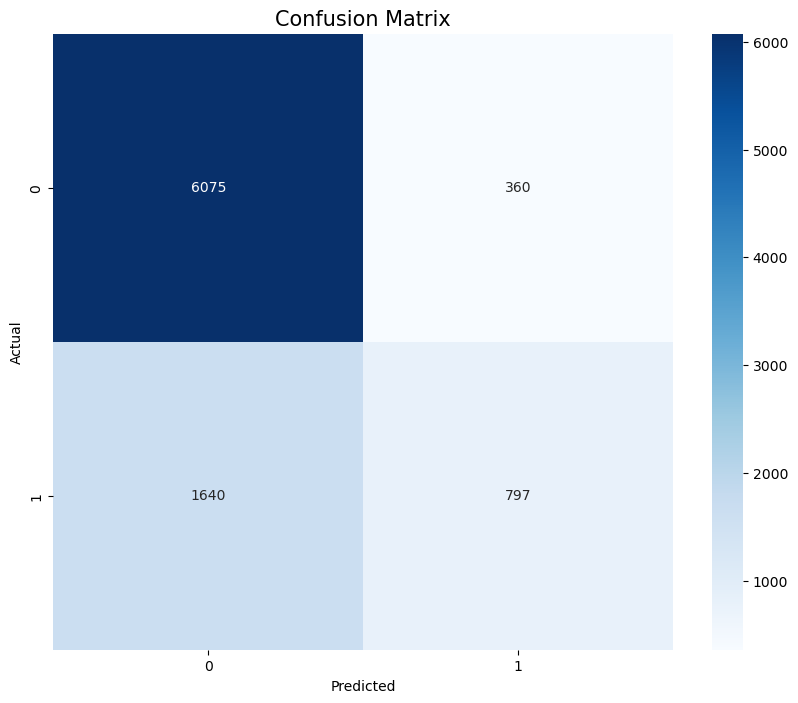

In [47]:
labels = ['0','1']
plt.figure(figsize=(10,8))
sns.heatmap(conf,annot=True,fmt='d',cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted',size=10)
plt.ylabel('Actual',size=10)
plt.title('Confusion Matrix',size=15)
plt.show()

### ROC Curve

In [48]:
from sklearn.metrics import roc_curve

In [49]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

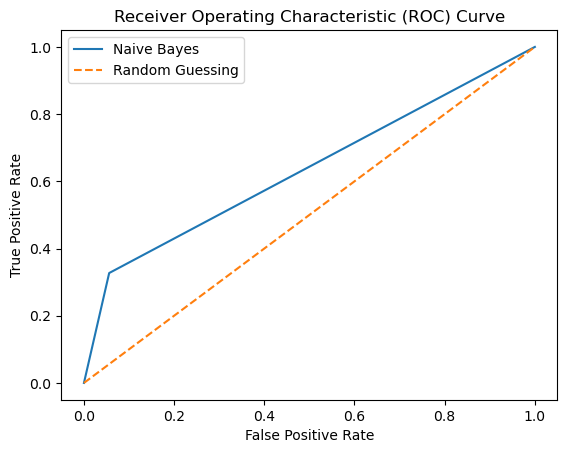

In [50]:
plt.plot(fpr,tpr,label='Naive Bayes')
plt.plot([0, 1], [0, 1], '--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()